Confusion Matrix:
 [[1 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



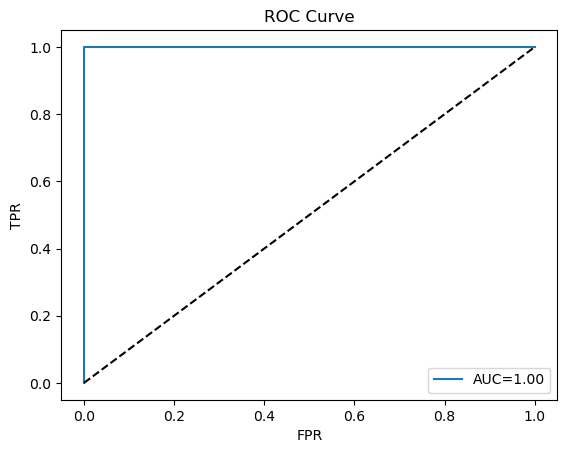

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("enjoysport.csv")
X = df.drop("enjoysport", axis=1).apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(df["enjoysport"])

# Train on all data (small dataset)
clf = DecisionTreeClassifier(criterion="entropy").fit(X, y)
y_pred = clf.predict(X)

# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# ROC & AUC (binary classes)
if len(set(y)) == 2:  # only for binary
    y_prob = clf.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label=f"AUC={auc(fpr, tpr):.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend()
    plt.show()
